In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C://Users//MY PC//Downloads//Online Payment Fraud Detection.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
# Create a function that will label 'isFraud column properly'

def Fraud(x):
    '''Return fraud  or not fraud based on isfraud feature'''
    if x == 1:
        return "Fraud"
    else:
        return 'Not Fraud'

df['Fraud_label'] = df['isFraud'].apply(Fraud)
df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


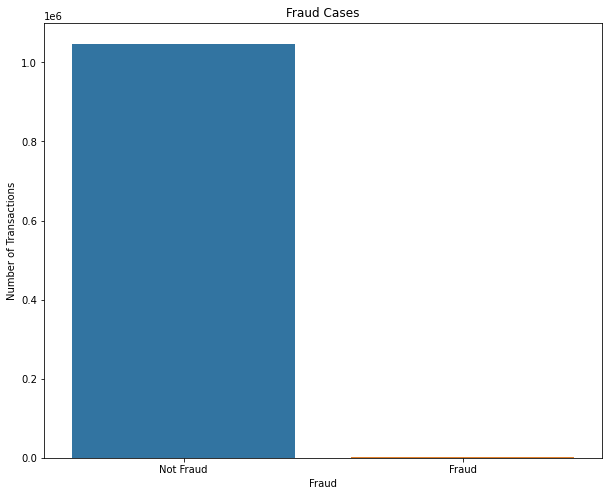

In [8]:
plt.figure(figsize=(10,8))
plt.title('Fraud Cases')
sns.countplot(data=df, x='Fraud_label')
plt.xlabel('Fraud')
plt.ylabel('Number of Transactions')
plt.show()

In [9]:
df['Fraud_label'].value_counts()

Not Fraud    1047433
Fraud           1142
Name: Fraud_label, dtype: int64

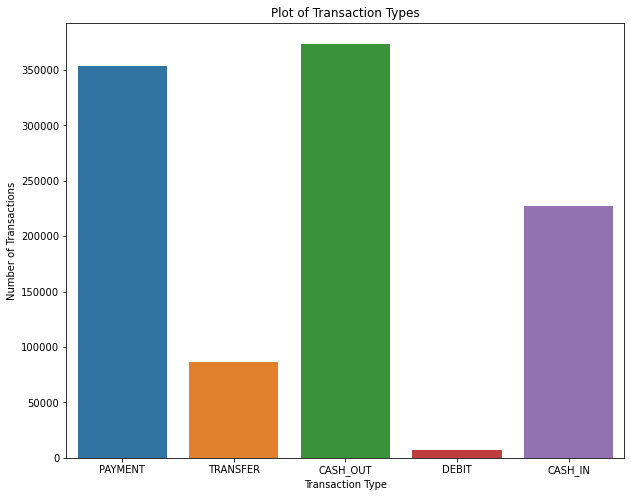

In [10]:
plt.figure(figsize=(10,8))
plt.title('Plot of Transaction Types')
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

In [11]:
#sns.pairplot(df)

<AxesSubplot:>

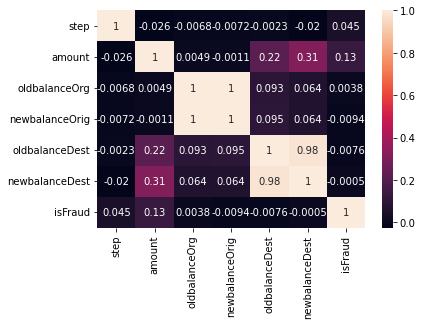

In [12]:
corel = df.corr()
sns.heatmap(corel, annot=True)

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Fraud_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  Fraud_label     1048575 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 88.0+ MB


In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


<AxesSubplot:xlabel='Fraud_label', ylabel='count'>

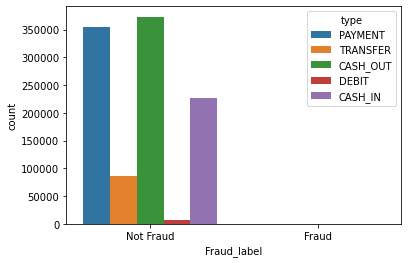

In [16]:
sns.countplot(x='Fraud_label', hue='type', data = df)

In [17]:
df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

### Preprocessing

In [18]:
# Variable Encoding
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'Fraud_label'],
      dtype='object')

In [19]:
df['Fraud_label'] = df['Fraud_label'].astype('category').cat.codes
df['Fraud_label']

0          1
1          1
2          0
3          0
4          1
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: Fraud_label, Length: 1048575, dtype: int8

In [20]:
# Seperate target column
y = df['isFraud']
df = df.drop(['isFraud', 'nameOrig', 'nameDest', 'Fraud_label'], axis=1)

In [21]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [22]:
df = pd.get_dummies(df)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [23]:
#from sklearn import

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-1.6620219 , -0.56173807, -0.23685497, ..., -0.08302207,
         1.40112074, -0.30032736],
       [-1.6620219 , -0.59184049, -0.28695576, ..., -0.08302207,
         1.40112074, -0.30032736],
       [-1.6620219 , -0.59819391, -0.29404519, ..., -0.08302207,
        -0.71371437,  3.32969997],
       ...,
       [ 4.35465419, -0.54550648, -0.28719266, ..., -0.08302207,
         1.40112074, -0.30032736],
       [ 4.35465419, -0.56105712, -0.26361732, ..., -0.08302207,
         1.40112074, -0.30032736],
       [ 4.35465419, -0.55565977, -0.26698909, ..., -0.08302207,
         1.40112074, -0.30032736]])

### Model Building

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test, = train_test_split(df, y,test_size=0.2, random_state=0)

In [28]:
print(x_train.shape)
print(x_test.shape)

(838860, 11)
(209715, 11)


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
prediction = clf.predict(x_test)
# prediction

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
score = roc_auc_score(y_test, prediction)
score

0.6470540501230135

### Naive Bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [36]:
nb_pred = nb.predict(x_test)
nb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
score2 = roc_auc_score(y_test, nb_pred)
score2

0.7830178032507287